## Worker thread code


In [21]:
import threading
import queue
import cv2  # OpenCV for image processing
from mpi4py import MPI  # MPI for distributed computing
import numpy as np
import matplotlib.pyplot as plt

class WorkerThread(threading.Thread):
    def __init__(self, task_queue):
        threading.Thread.__init__(self)
        self.task_queue = task_queue
        self.comm = MPI.COMM_WORLD
        self.rank = self.comm.Get_rank()
        self.result = None  # Variable to store processed result

    def run(self):
        while True:
            task = self.task_queue.get()
            if task is None:
                break

            image, operation = task
            result = self.process_image(image, operation)
            self.comm.send(result, dest=0)

    def process_image(self, image, operation):
        # Load the image
        img = cv2.imread(image, cv2.IMREAD_COLOR)

        # Perform the specified operation
        if operation == 'edge_detection':
            result = cv2.Canny(img, 100, 200)
        elif operation == 'color_inversion':
            result = cv2.bitwise_not(img)  # Add more operations as needed...
        
        return result


## Testing worker thread code

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


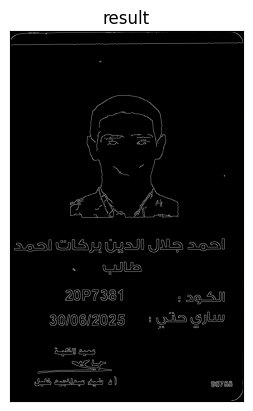

In [22]:
# Create a task queue
task_queue = queue.Queue()

# Instantiate WorkerThread
worker_thread = WorkerThread(task_queue)

# Add image processing task to the queue
image_path = "WhatsApp Image 2024-04-26 at 2.53.23 PM.jpeg"
operation = "edge_detection"  # Specify the desired operation
task_queue.put((image_path, operation))

# Start WorkerThread
worker_thread.start()


if MPI.COMM_WORLD.Get_rank() == 0:  # Only master node receives result
    processed_result = MPI.COMM_WORLD.recv(source=0)
    print(processed_result)
    plt.xticks([], [])
    plt.yticks([], [])
    plt.title('result')
    plt.imshow(cv2.cvtColor(processed_result, cv2.COLOR_BGR2RGB))
    plt.show()
